In [1]:
#I Wayan Krisna Gita Santika 1301170109

In [2]:
#Import Library
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

# Data Preparation

In [3]:
#Open data CSV
df = pd.read_csv("fifa20.csv")

pd.set_option('display.max_rows', None)

# #Checking validation data with see the first 10
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [4]:
#Dropping Unused Feature
df = df.drop(['player_url','long_name','dob','weight_kg','nationality','club','preferred_foot','nation_position','international_reputation','weak_foot','skill_moves','work_rate','body_type','real_face','release_clause_eur','player_tags','team_position','team_jersey_number','joined','nation_jersey_number','player_traits','attacking_crossing','attacking_short_passing','attacking_volleys','skill_dribbling','skill_curve','skill_fk_accuracy','skill_long_passing','movement_reactions','movement_balance','power_shot_power','power_jumping','power_stamina','power_strength','power_long_shots','mentality_aggression','mentality_interceptions','mentality_vision','mentality_penalties','defending_marking','defending_standing_tackle','defending_sliding_tackle', 'ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb','goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_reflexes','goalkeeping_positioning','gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning','loaned_from','physic','contract_valid_until','value_eur','wage_eur','potential','height_cm','age','overall','defending'], axis = 1)

In [5]:
#Checking the Info of All Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sofifa_id                   18278 non-null  int64  
 1   short_name                  18278 non-null  object 
 2   player_positions            18278 non-null  object 
 3   pace                        16242 non-null  float64
 4   shooting                    16242 non-null  float64
 5   passing                     16242 non-null  float64
 6   dribbling                   16242 non-null  float64
 7   attacking_finishing         18278 non-null  int64  
 8   attacking_heading_accuracy  18278 non-null  int64  
 9   skill_ball_control          18278 non-null  int64  
 10  movement_acceleration       18278 non-null  int64  
 11  movement_sprint_speed       18278 non-null  int64  
 12  movement_agility            18278 non-null  int64  
 13  mentality_positioning       182

In [6]:
# For player_positions Column, Generalize Their Position by Grouping into Midfielder and Non-Midfielder.
transform1 = lambda x: x.split(',')[0]

def transform2(x):
    if x =='CDM' or x =='CAM' or x =='CM':
        x = 'Midfielder'
    else :
        x = 'Non-Midfielder'
    return x

df['player_positions'] = df['player_positions'].apply(transform1)
df['player_positions'] = df['player_positions'].apply(transform2)

In [7]:
#Checking the value of Dataset to make sure still the same like before
df['player_positions'].value_counts()

Non-Midfielder    13515
Midfielder         4763
Name: player_positions, dtype: int64

In [8]:
#Labeling Player Positions with Label Encoder
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['midfield_pos'] = labelencoder.fit_transform(df['player_positions'])

In [9]:
#Checking the Data After Labelling
df.head()

,sofifa_id,short_name,player_positions,pace,shooting,passing,dribbling,attacking_finishing,attacking_heading_accuracy,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,mentality_positioning,mentality_composure,midfield_pos
0,158023,L. Messi,Non-Midfielder,87.0,92.0,92.0,96.0,95,70,96,91,84,93,94,96,1
1,20801,Cristiano Ronaldo,Non-Midfielder,90.0,93.0,82.0,89.0,94,89,92,89,91,87,95,95,1
2,190871,Neymar Jr,Non-Midfielder,91.0,85.0,87.0,95.0,87,62,95,94,89,96,87,94,1
3,200389,J. Oblak,Non-Midfielder,NaN,NaN,NaN,NaN,11,15,30,43,60,67,11,68,1
4,183277,E. Hazard,Non-Midfielder,91.0,83.0,86.0,94.0,84,61,94,94,88,95,87,91,1


In [10]:
#Drop player_positions Column, because changed with midfield_pos
df = df.drop(columns=['player_positions'], axis = 1)

#Drop sofifa_id and short_name because we don't use it on Data Training and Data Test
df.drop(columns=['sofifa_id','short_name'], inplace=True)

# Data Exploration

In [11]:
#Checking The Missing Values
df.isnull().sum()

pace                          2036
shooting                      2036
passing                       2036
dribbling                     2036
attacking_finishing              0
attacking_heading_accuracy       0
skill_ball_control               0
movement_acceleration            0
movement_sprint_speed            0
movement_agility                 0
mentality_positioning            0
mentality_composure              0
midfield_pos                     0
dtype: int64

In [12]:
#Handle missing value with Mean
df['pace'].fillna(df['pace'].mean(), inplace=True)
df['shooting'].fillna(df['shooting'].mean(), inplace=True)
df['passing'].fillna(df['passing'].mean(), inplace=True)
df['dribbling'].fillna(df['dribbling'].mean(), inplace=True)

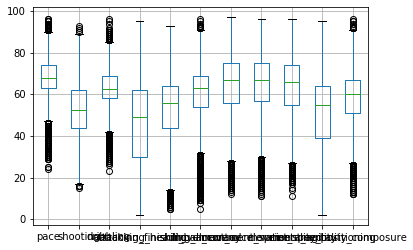

In [13]:
#Boxplot for Checking If Data Scalling Needed or Not
df.boxplot(column=['pace','shooting', 'dribbling', 'attacking_finishing','attacking_heading_accuracy','skill_ball_control','movement_acceleration','movement_sprint_speed','movement_agility','mentality_positioning','mentality_composure'])

In [14]:
#Data Scalling

scaler = preprocessing.MinMaxScaler()
df[['pace','shooting', 'dribbling', 'attacking_finishing','attacking_heading_accuracy','skill_ball_control','movement_acceleration','movement_sprint_speed','movement_agility','mentality_positioning','mentality_composure']] = scaler.fit_transform(df[['pace','shooting', 'dribbling', 'attacking_finishing','attacking_heading_accuracy','skill_ball_control','movement_acceleration','movement_sprint_speed','movement_agility','mentality_positioning','mentality_composure']])

In [15]:
#Export data Into CSV File
df.to_csv('fifa20_resultexploration.csv')

In [16]:
#Checking Data Before Splitting
df.head()

,pace,shooting,passing,dribbling,attacking_finishing,attacking_heading_accuracy,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,mentality_positioning,mentality_composure,midfield_pos
0,0.875000,0.987179,92.000000,1.000000,1.000000,0.738636,1.000000,0.929412,0.858824,0.964706,0.989247,1.000000,1
1,0.916667,1.000000,82.000000,0.904110,0.989247,0.954545,0.956044,0.905882,0.941176,0.894118,1.000000,0.988095,1
2,0.930556,0.897436,87.000000,0.986301,0.913978,0.647727,0.989011,0.964706,0.917647,1.000000,0.913978,0.976190,1
3,0.606957,0.478183,57.233777,0.541529,0.096774,0.113636,0.274725,0.364706,0.576471,0.658824,0.096774,0.666667,1
4,0.930556,0.871795,86.000000,0.972603,0.881720,0.636364,0.978022,0.964706,0.905882,0.988235,0.913978,0.940476,1


In [17]:
#Splitting the Train Input and Output Data
#--Take all the 12 features as input X and class as output Y.--#
from sklearn.model_selection import train_test_split
X = df.drop(axis=0, columns=['midfield_pos'])
Y = df.midfield_pos.values

#Print The Shape of X and Y
print(X.shape)
print(Y.shape)

#Splitting into Data Training and Data Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

(18278, 12)
(18278,)


# Classification

Comparing Naive Bayes, SVM, Decision Tree and KNN Algorithm

In [18]:
#Importing Libray for Accuracy Meassurement
from sklearn.metrics import accuracy_score

In [19]:
#Naive bayes
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
accuracy_score(y_test, y_pred)

0.7398872679045093

In [20]:
#SVM
from sklearn.svm import SVC
svm = SVC(gamma = 'auto')
svm.fit(X_train, y_train)
y_pred= svm.predict(X_test)
accuracy_score(y_test,y_pred)

0.8068633952254642

In [21]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_test,y_pred)

0.7977453580901857

In [22]:
#K-NN
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,y_train)
y_pred = neigh.predict(X_test)
accuracy_score(y_test,y_pred)

0.8254310344827587

# Evaluation